# Location Analysis for Presentation in Tuscnay

Created by: Orsi Vasarhelyi

Last updated: 09.07.2018.



In [1]:
import json
import os
import pickle
import psycopg2
import sqlalchemy
import pyproj

import pandas as pd
import sys
sys.path.append("..")
from connect_db import db_connection


In [32]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
username='ovasarhelyi'
cred_location = '/mnt/data/'+username+'/TPT_tourism/connect_db/data_creds_redshift.json.nogit'
db = db_connection.DBConnection(cred_location)

In [3]:
query="""select * from tuscany.german_august_locs_features"""

In [4]:
df_vodafone = db.sql_query_to_data_frame(query, cust_id=False)

In [8]:
df_vodafone.columns

Index(['customer_id', 'total_time', 'forest', 'water', 'river', 'park',
       'arezzo', 'florence', 'livorno', 'lucca', 'pisa', 'pistoia', 'siena',
       'coast', 'num_attrs', 'towns', 'islands', 'subrub'],
      dtype='object')

In [61]:
cities=['arezzo', 'florence', 'livorno', 'lucca', 'pisa', 'pistoia', 'siena', 'coast']

In [17]:
df_vodafone.columns[1:]

Index(['total_time', 'forest', 'water', 'river', 'park', 'arezzo', 'florence',
       'livorno', 'lucca', 'pisa', 'pistoia', 'siena', 'coast', 'num_attrs',
       'towns', 'islands', 'subrub'],
      dtype='object')

In [25]:
df_vodafone2=df_vodafone

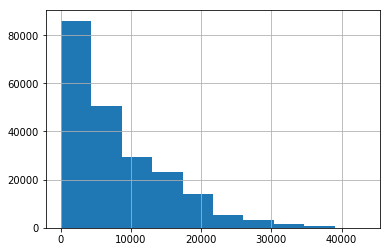

In [24]:
df_vodafone.total_time.hist()

In [27]:
def digitalize_data(row):
    return pd.to_numeric(row[col], errors="ignore", downcast='float')

In [29]:
for col in df_vodafone2.columns[1:]:
    print(col)
    df_vodafone2[col]=df_vodafone2.apply(digitalize_data, 1)

total_time
forest
water
river
park
arezzo
florence
livorno
lucca
pisa
pistoia
siena
coast
num_attrs
towns
islands
subrub


In [108]:
def plot_corr(x, col):   
    sns.set(style="white")
    k=x.corr()
    corr = np.round(k,5)
    
    corr=corr.rename(columns=)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    ax1=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=col, center=0,
            square=True, linewidths=.5)
    #ax1.xaxis.set_label_position('top') 
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    #plt.legend('')
    
    return ax1

In [57]:
df_vodafone2=df_vodafone2.replace(np.nan, 0)

In [134]:
df_vodafone2[cities].corr()

,arezzo,florence,livorno,lucca,pisa,pistoia,siena,coast
arezzo,1.000000,-0.003626,-0.006612,-0.007101,-0.007563,-0.003222,0.001177,-0.007640
florence,-0.003626,1.000000,-0.015868,-0.004079,0.003472,0.001070,0.013320,-0.018795
livorno,-0.006612,-0.015868,1.000000,-0.006469,0.009481,-0.002541,-0.010882,0.161551
lucca,-0.007101,-0.004079,-0.006469,1.000000,0.017797,0.008064,-0.005198,-0.005047
pisa,-0.007563,0.003472,0.009481,0.017797,1.000000,0.001656,-0.002516,0.141900
pistoia,-0.003222,0.001070,-0.002541,0.008064,0.001656,1.000000,-0.001087,-0.003219
siena,0.001177,0.013320,-0.010882,-0.005198,-0.002516,-0.001087,1.000000,-0.010708
coast,-0.007640,-0.018795,0.161551,-0.005047,0.141900,-0.003219,-0.010708,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdabc90080>,
      dtype=object)

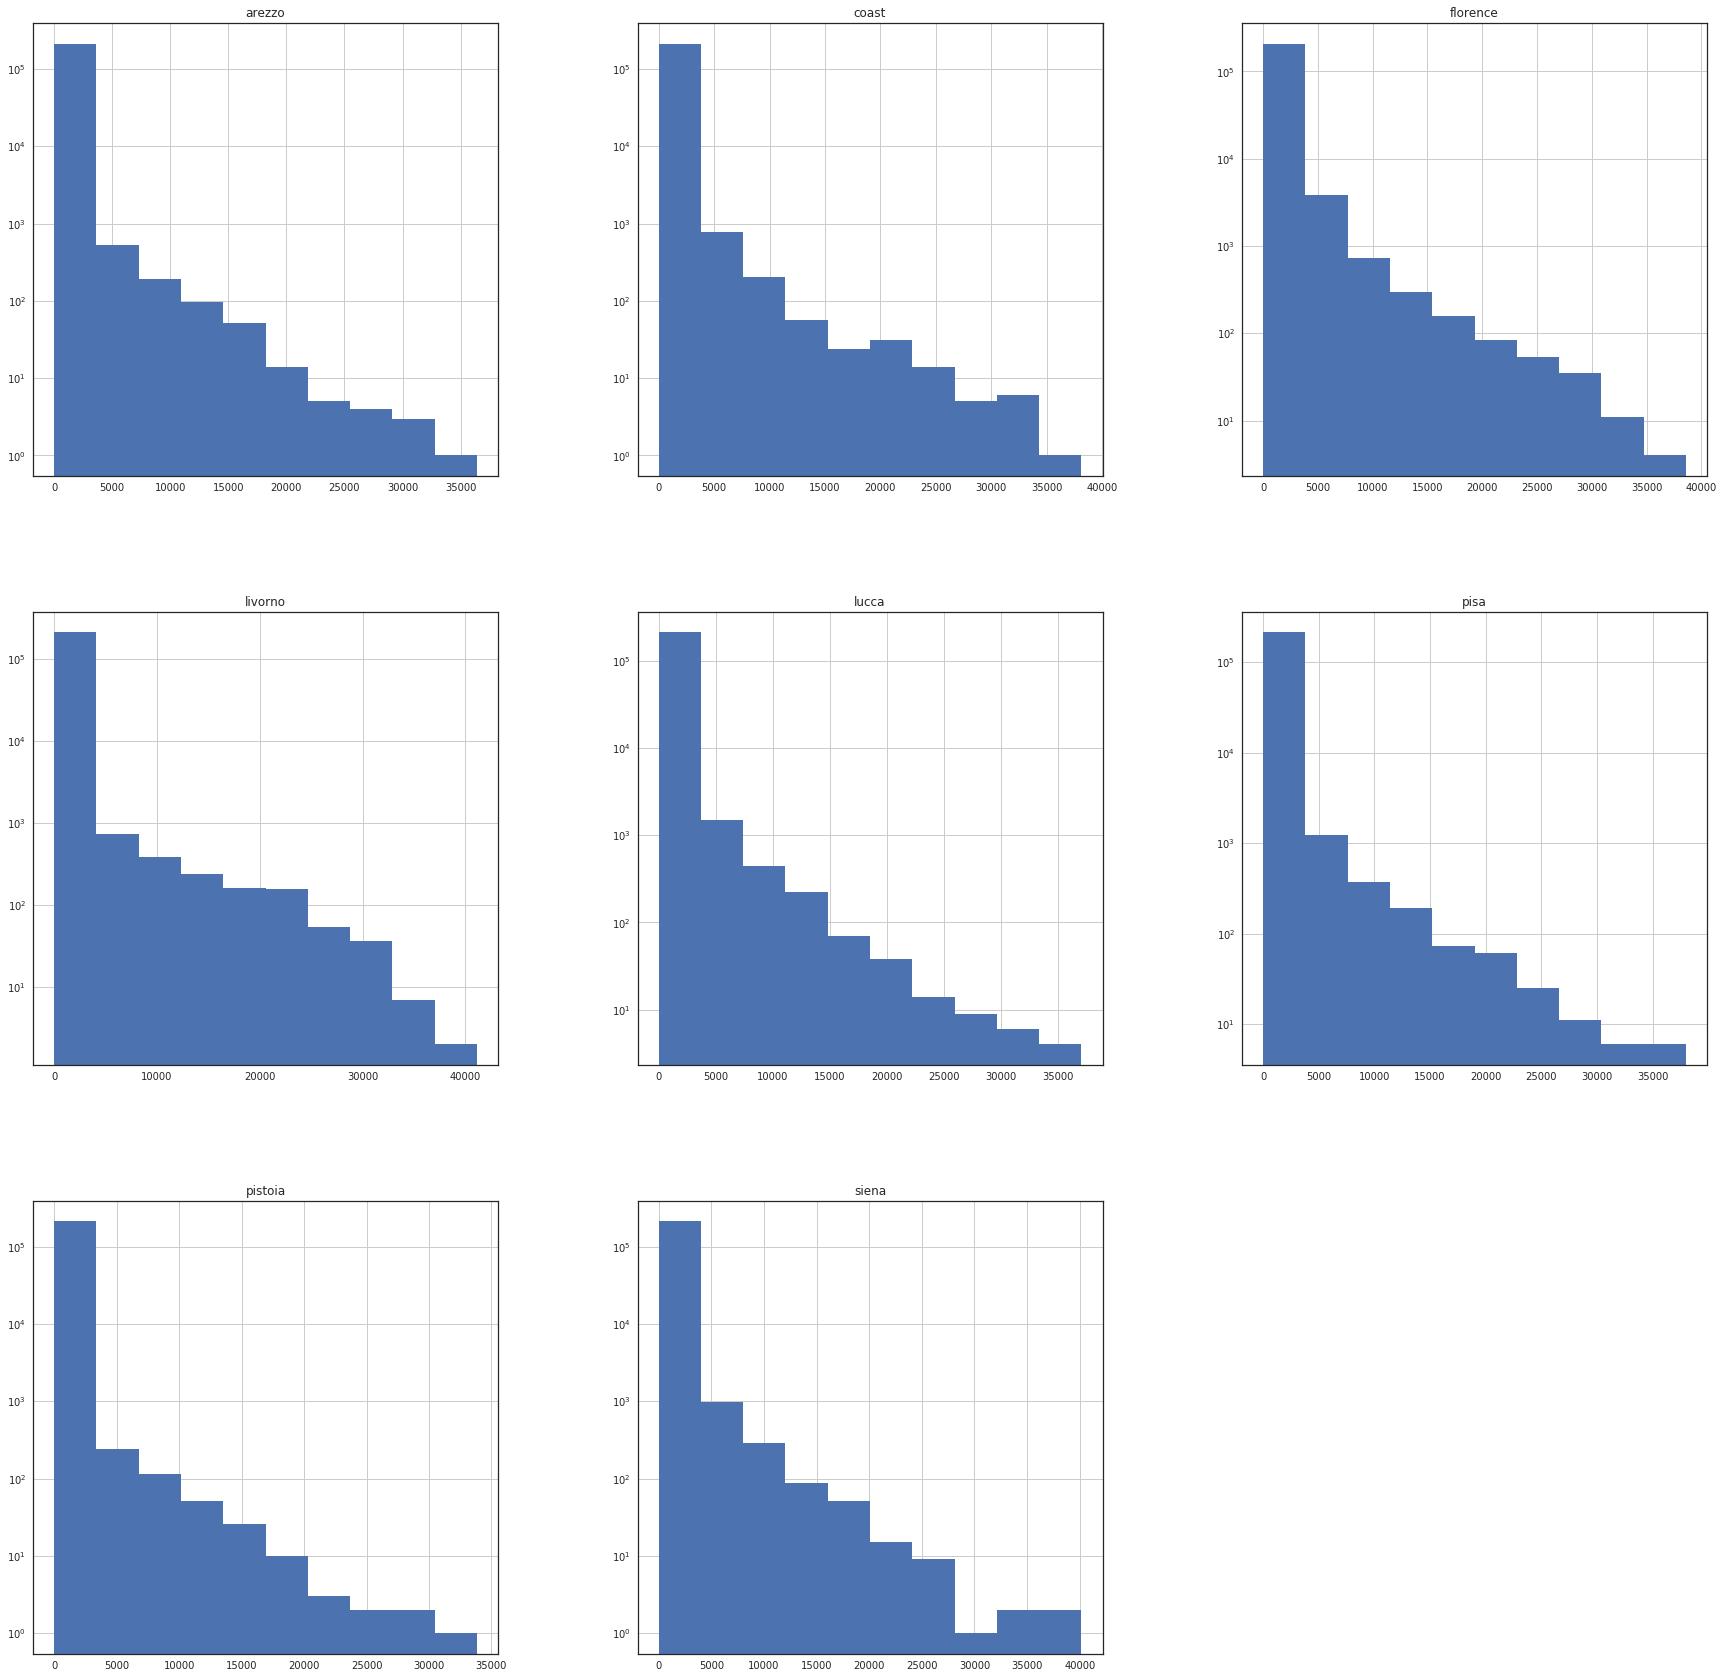

In [78]:
df_vodafone2[cities].hist(log=True, figsize=(30,30))

In [165]:
def create_dummies(row):
    if row[loc]>0:
        return 1
    else:
        return 0

In [174]:
df_vodafone3=df_vodafone2

In [175]:
for loc in cities:
    df_vodafone3[loc]=df_vodafone2.apply(create_dummies,1)

In [159]:
for col in ['dummy_arezzo',
       'dummy_florence', 'dummy_livorno', 'dummy_lucca', 'dummy_pisa',
       'dummy_pistoia', 'dummy_siena', 'dummy_coast', 'arezzod', 'florenced',
       'livornod', 'luccad', 'pisad', 'pistoiad', 'sienad', 'coastd']:
    del df_vodafone2[col]

In [176]:
#df_vodafone2.columns

In [177]:
dummies=['arezzo', 'florence',
       'livorno', 'lucca', 'pisa', 'pistoia', 'siena', 'coast']

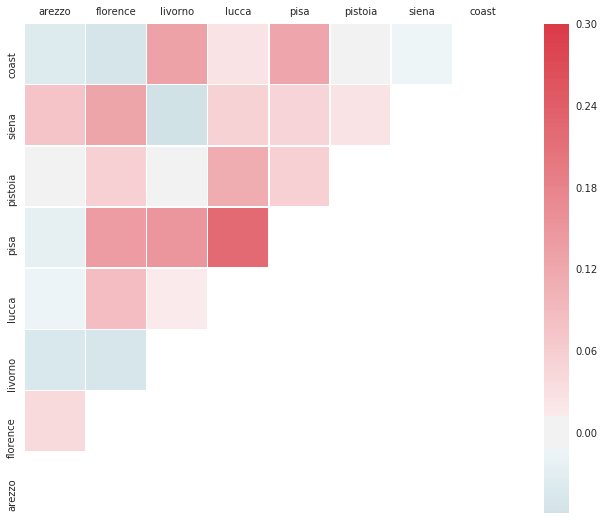

In [178]:
plot_corr(df_vodafone3[dummies], col=0.3)

In [179]:
df_vodafone3[dummies].corr()

,arezzo,florence,livorno,lucca,pisa,pistoia,siena,coast
arezzo,1.000000,0.038516,-0.046395,-0.015325,-0.025426,-0.001629,0.074713,-0.037644
florence,0.038516,1.000000,-0.048497,0.084014,0.138932,0.056217,0.125686,-0.053067
livorno,-0.046395,-0.048497,1.000000,0.013915,0.151679,-0.010341,-0.059337,0.130361
lucca,-0.015325,0.084014,0.013915,1.000000,0.220167,0.113317,0.053319,0.025385
pisa,-0.025426,0.138932,0.151679,0.220167,1.000000,0.056224,0.049070,0.124266
pistoia,-0.001629,0.056217,-0.010341,0.113317,0.056224,1.000000,0.024921,-0.003391
siena,0.074713,0.125686,-0.059337,0.053319,0.049070,0.024921,1.000000,-0.011879
coast,-0.037644,-0.053067,0.130361,0.025385,0.124266,-0.003391,-0.011879,1.000000


In [181]:
germans=pd.read_csv('/mnt/data/shared/clusters_Germans_Aug_10000_sample.csv')

In [184]:
germans=germans.set_index('ids')

In [187]:
query2="""select * from tuscany.german_august_all_features_new"""

In [188]:
features=db.sql_query_to_data_frame(query2, cust_id=True)

In [191]:
germans_with_features=features.set_index("customer_nr").join(germans)

In [193]:
germans_with_features.cluster.value_counts()

2.0    3764
1.0    2953
3.0    1748
4.0     865
5.0     422
Name: cluster, dtype: int64

In [196]:
for col in germans_with_features.columns:
    print(col)
    germans_with_features[col]=germans_with_features.apply(digitalize_data, 1)

mcc
hr_arvl_tusc
day_of_wk_arvl_tusc
mon_arvl_tusc
day_arvl_tusc
loc_arvl_tusc
hr_arvl_italy
day_of_wk_arvl_italy
mon_arvl_italy
day_arvl_italy
loc_arvl_italy
locs_outside_tuscany
num_uniuqe_loc_in_italy
num_loc_in_italy
num_uniuqe_loc_in_tusc
num_loc_in_tusc
unique_locs_outside_tuscany
start_lat
start_lon
end_lat
end_lon
hrs_in_italy
hrs_in_tusc
avg_lat
avg_lon
top_lat
top_lon
std_lat
std_lon
hrs_outside_tuscany
start_lat_tusc
start_lon_tusc
total_time
forest
water
river
park
arezzo
florence
livorno
lucca
pisa
pistoia
siena
coast
num_attrs
towns
islands
subrub
Unnamed: 0
cluster


In [197]:
germans_with_features[germans_with_features['cluster']==2.].describe()

,mcc,hr_arvl_tusc,day_of_wk_arvl_tusc,mon_arvl_tusc,day_arvl_tusc,loc_arvl_tusc,hr_arvl_italy,day_of_wk_arvl_italy,mon_arvl_italy,day_arvl_italy,...,pisa,pistoia,siena,coast,num_attrs,towns,islands,subrub,Unnamed: 0,cluster
count,3764.0,3764.000000,3764.000000,3764.0,3764.000000,3.764000e+03,3764.000000,3764.000000,3764.0,3764.000000,...,335.000000,78.000000,338.000000,3623.000000,3623.000000,3623.000000,3623.0,3623.000000,3764.000000,3764.0
mean,262.0,13.834750,3.320138,8.0,16.662327,1.842918e+07,10.873273,3.320138,8.0,16.662327,...,829.429851,1701.038462,946.186391,80.065415,13.252553,0.961634,0.0,143.642009,5069.025239,2.0
std,0.0,4.651478,2.297281,0.0,8.631897,2.446840e+07,6.177431,2.297281,0.0,8.631897,...,1706.815272,2336.557799,1659.300497,530.922489,29.881895,4.224108,0.0,1034.153002,2918.761888,0.0
min,262.0,0.000000,0.000000,8.0,1.000000,1.106533e+06,0.000000,0.000000,8.0,1.000000,...,21.000000,21.000000,21.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,2.0
25%,262.0,11.000000,1.000000,8.0,9.000000,3.600818e+06,7.000000,1.000000,8.0,9.000000,...,69.500000,107.250000,131.000000,0.000000,0.000000,0.000000,0.0,0.000000,2558.500000,2.0
50%,262.0,14.000000,3.000000,8.0,18.000000,3.631303e+06,11.000000,3.000000,8.0,18.000000,...,161.000000,745.000000,256.000000,0.000000,3.000000,0.000000,0.0,0.000000,5075.500000,2.0
75%,262.0,17.000000,6.000000,8.0,25.000000,5.637001e+07,15.000000,6.000000,8.0,25.000000,...,577.500000,2440.250000,1072.250000,0.000000,12.000000,1.000000,0.0,0.000000,7658.250000,2.0
max,262.0,23.000000,6.000000,8.0,31.000000,8.620503e+07,23.000000,6.000000,8.0,31.000000,...,9897.000000,10037.000000,9995.000000,8792.000000,378.000000,68.000000,0.0,25576.000000,9997.000000,2.0


In [ ]:
german_cluster2=pd.read